In [2]:
import warnings
warnings.filterwarnings('ignore')
import csv
import pandas as pd
import string
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

In [3]:
def parse_data_from_input(filename):
  df = pd.read_csv(filename)
  labels = []
  images = []
  for i, row in df.iterrows():
    if i > 0:
        labels.append(row[0])
        images.append(row[1:])

  images = np.array(images, dtype=np.float64)
  labels = np.array(labels, dtype=np.float64)

  images = images.reshape(images.shape[0], 28, 28 )


  return images, labels

In [4]:
training_images, training_labels = parse_data_from_input('train.csv')

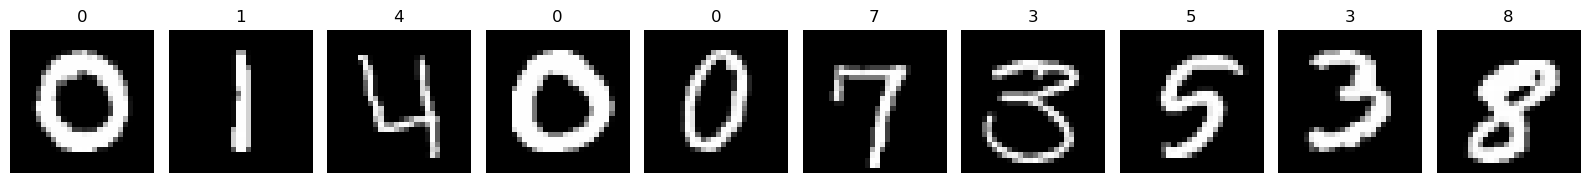

In [5]:
def plot_categories(training_images, training_labels):
  fig, axes = plt.subplots(1, 10, figsize=(16, 15))
  axes = axes.flatten()
  digits = [i for i in range(10)]

  for k in range(10):
    img = training_images[k]
    img = np.expand_dims(img, axis=-1)
    img = array_to_img(img)
    ax = axes[k]
    ax.imshow(img, cmap="Greys_r")
    ax.set_title(f"{digits[int(training_labels[k])]}")
    ax.set_axis_off()

  plt.tight_layout()
  plt.show()

plot_categories(training_images, training_labels)

In [6]:
training_len = int(len(training_images)*0.8)
print(training_len)

33599


In [7]:
validation_images = training_images[:training_len]
validation_labels = training_labels[:training_len]

training_images = training_images[:training_len]
training_labels = training_labels[:training_len]

In [8]:
def train_val_generators(training_images, training_labels, validation_images, validation_labels):

    training_images = training_images.reshape(training_images.shape[0], training_images.shape[1], training_images.shape[2], 1)
    validation_images = validation_images.reshape(validation_images.shape[0], validation_images.shape[1], validation_images.shape[2], 1)

    # training_images = np.expand_dims(training_images, axis=3)
    # testing_images = np.expand_dims(validation_images, axis=3)

    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )


    # Pass in the appropriate arguments to the flow method
    train_generator = train_datagen.flow(x=training_images,
                                        y=training_labels,
                                        batch_size=32)


    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    # Remember that validation data should not be augmented
    validation_datagen = ImageDataGenerator(rescale=1.0 / 255)


    # Pass in the appropriate arguments to the flow method
    validation_generator = validation_datagen.flow(x=validation_images,
                                                    y=validation_labels,
                                                    batch_size=32)

    ### END CODE HERE

    return train_generator, validation_generator

In [9]:
train_generator, validation_generator = train_val_generators(training_images, training_labels, validation_images, validation_labels)


## Inception Model

In [10]:
from inception import InceptionModel

In [11]:
inception_model = InceptionModel(nClasses = 10)

In [12]:
epochs = 100
batch_size = 128
es = tf.keras.callbacks.EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=10, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True, # 
     )

In [13]:
inception_model.compile(
        optimizer='adam',#RMSprop(learning_rate = 0.0003),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

In [14]:
history = inception_model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator, callbacks = es)

Epoch 1/100
1050/1050 [==============================] - 183s 174ms/step - loss: 1.2082 - accuracy: 0.5764 - val_loss: 0.5205 - val_accuracy: 0.8196
Epoch 2/100
1050/1050 [==============================] - 186s 177ms/step - loss: 0.6315 - accuracy: 0.7842 - val_loss: 0.3250 - val_accuracy: 0.8871
Epoch 3/100
1050/1050 [==============================] - 178s 170ms/step - loss: 0.5102 - accuracy: 0.8269 - val_loss: 0.3082 - val_accuracy: 0.8952
Epoch 4/100
1050/1050 [==============================] - 178s 170ms/step - loss: 0.4387 - accuracy: 0.8563 - val_loss: 0.2237 - val_accuracy: 0.9267
Epoch 5/100
1050/1050 [==============================] - 179s 170ms/step - loss: 0.3878 - accuracy: 0.8726 - val_loss: 0.1991 - val_accuracy: 0.9349
Epoch 6/100
1050/1050 [==============================] - 177s 168ms/step - loss: 0.3620 - accuracy: 0.8840 - val_loss: 0.1981 - val_accuracy: 0.9383
Epoch 7/100
1050/1050 [==============================] - 177s 169ms/step - loss: 0.3387 - accuracy: 0.8917

In [22]:
from sklearn.metrics import confusion_matrix

validation_images = validation_images.reshape(validation_images.shape[0], validation_images.shape[1], validation_images.shape[2], 1)
Y_true = np.argmax(validation_labels)

Y_pred = inception_model.predict(validation_images)
Y_pred_classes = np.argmax(Y_pred, axis=1)

confusionMatrix = confusion_matrix(validation_labels, Y_pred_classes)

# Şekil (figure) ve eksen (axis) nesnesini al
f, ax = plt.subplots(figsize=(10, 10))

# Isı haritasını çiz
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap="cividis", linecolor="black", fmt='.0f', ax=ax)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

ModuleNotFoundError: No module named 'sklearn'

: 

In [21]:
pip install sckit-learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sckit-learn (from versions: none)
ERROR: No matching distribution found for sckit-learn


## ResNet Model

In [ ]:
from ResNet import ResNet 

In [ ]:
resnet = ResNet(num_classes = 10)